In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

In [2]:
mglearn.plots.plot_linear_regression_wave()  # linear regression

w[0]: 0.393906  b: -0.031804


In [50]:
'''
線性迴歸
最小平方法(OLS)
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr的係數：{}".format(lr.coef_))
print("lr的截距：{}".format(lr.intercept_))

lr的係數：[ 0.39390555]
lr的截距：-0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))  # 訓練集
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))         # 測試集

Training set score: 0.67
Test set score:0.66


In [7]:
# for example boston sell house case
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))  # oversitting
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [12]:
'''
多變數線性迴歸 (Ridge regression)
'''
# boston sell house case
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)   # default alpha = 1
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [14]:
# alpha 值增加會強迫係數往零移動
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [15]:
# 減少 alpha 值會讓係數的限制變少
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


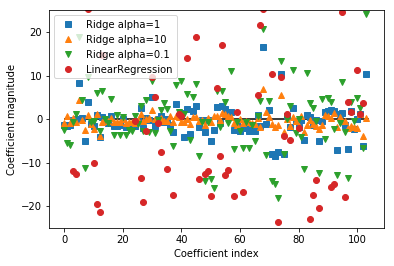

In [23]:
# 多變數迴歸用不同的值和線性迴歸係數比較圖
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

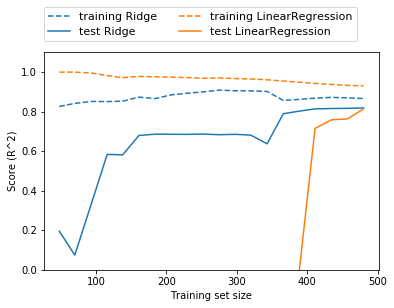

In [24]:
# 學習曲線
mglearn.plots.plot_ridge_n_samples()
plt.show()

In [26]:
'''
Lasso
用於正規化線性回歸
'''
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)   # default alpha = 1
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [28]:
# 增加「max_iter」預設值
# 否則模型將會出現要增加 max_iter 的警告
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [29]:
# oversitting
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


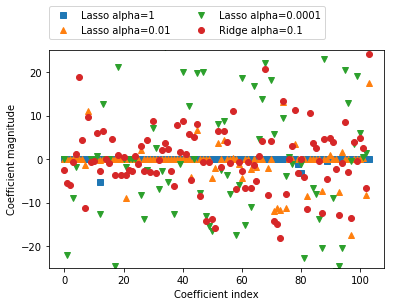

In [30]:
# 用不同的值的 Lasso和多變數迴歸係數比較圖
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

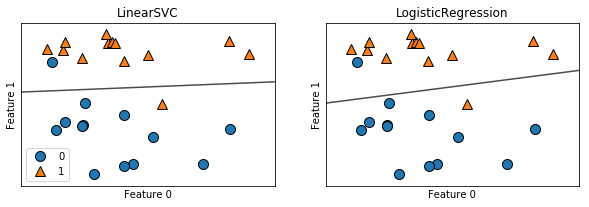

In [31]:
'''
分類用的線性模型
SVM, LinearSVC
LogisticRegression, forge資料集
'''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 線性支援向量機和邏輯迴歸用 forge資料集和預測參數所做出的判別邊界
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

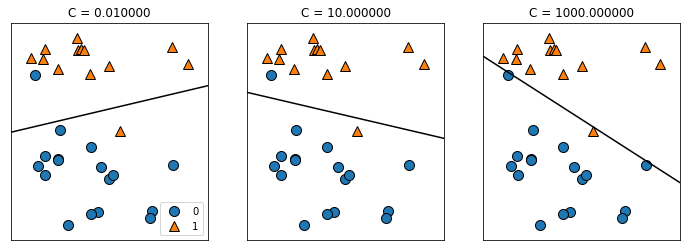

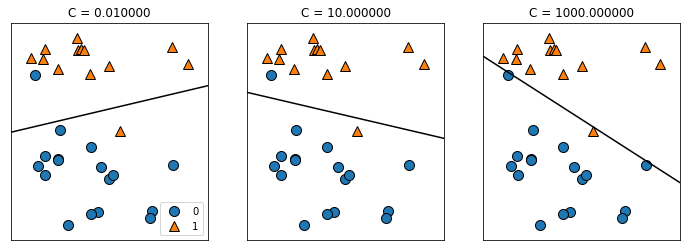

In [33]:
# 線性支援向量機和邏輯迴歸用 forge資料集和不同參數C 所做出的判別邊界
mglearn.plots.plot_linear_svc_regularization()
plt.show()

In [34]:
# cancer datasets case
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)    # default C = 1
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [36]:
# C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.979
Test set score: 0.965


In [37]:
# C=0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


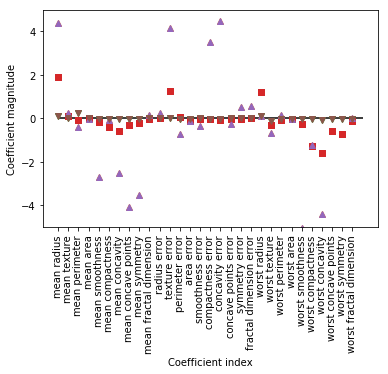

In [39]:
# 乳癌資料集用邏輯迴歸和不同的C值所得的係數圖
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


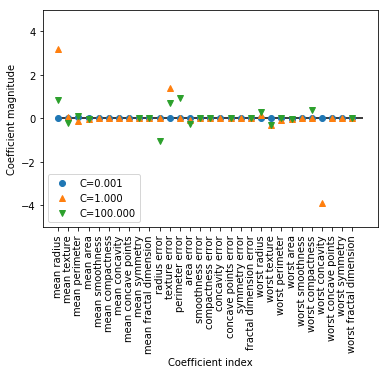

In [42]:
# L1 正規化
# 乳癌資料集用不同 C值和 L1懲罰的邏輯迴歸得到的係數
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

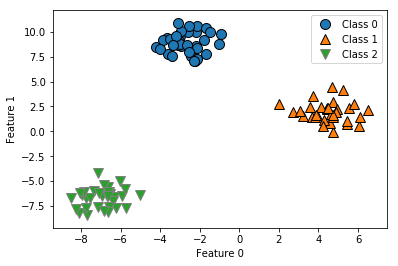

In [57]:
'''
多元分類的線性模型
'''
from sklearn.datasets import make_blobs

# 包含三個類別的二維玩具資料集
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [58]:
linear_svm = LinearSVC().fit(X, y)   # 用資料集來訓練出一個 LinearSVC
print("係數的形狀: ", linear_svm.coef_.shape)
print("截距的形狀: ", linear_svm.intercept_.shape)

係數的形狀:  (3, 2)
截距的形狀:  (3,)


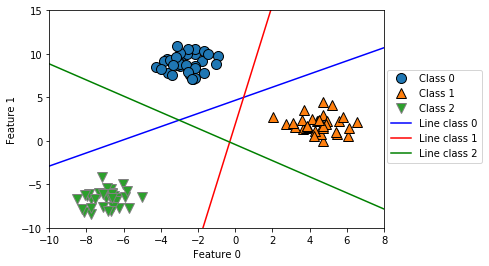

In [59]:
# 由三個 one-vs.-rest 分類器所得到的判別邊界
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
           'Line class 2'], loc=(1.01, 0.3))
plt.show()

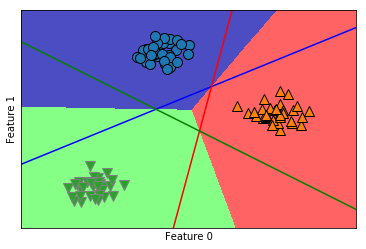

In [61]:
# 衍生自三個 one-vs.-rest 分類器的多元判別邊界 (2D空間)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()